# 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Loading Dataset

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/azaz6216/dataset/refs/heads/main/diabetes.csv")

# 3. EDA (Exploratory Data Analysis)

### a. Understanding the Dataset

- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### b. Cleaning the Dataset

- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for specified value occurance in feature

In [11]:

print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


## Fill the zeros

Consider the skewedness of the data, if it is a normal distributed datam use mean, if it skewed data, use median

In [12]:

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())
data['BMI']=data['BMI'].replace(0,data['BMI'].median())

In [13]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


# 4. Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

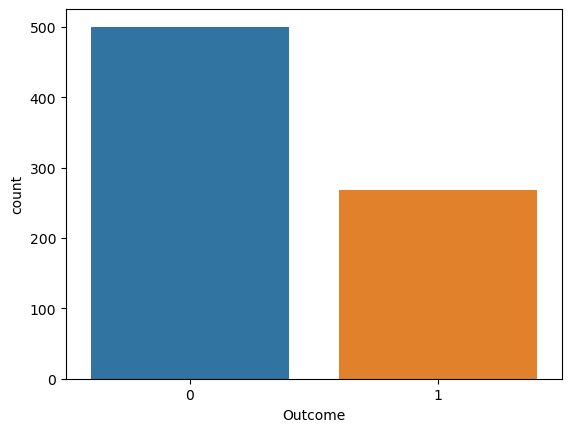

In [14]:
sns.countplot(x='Outcome', data = data)

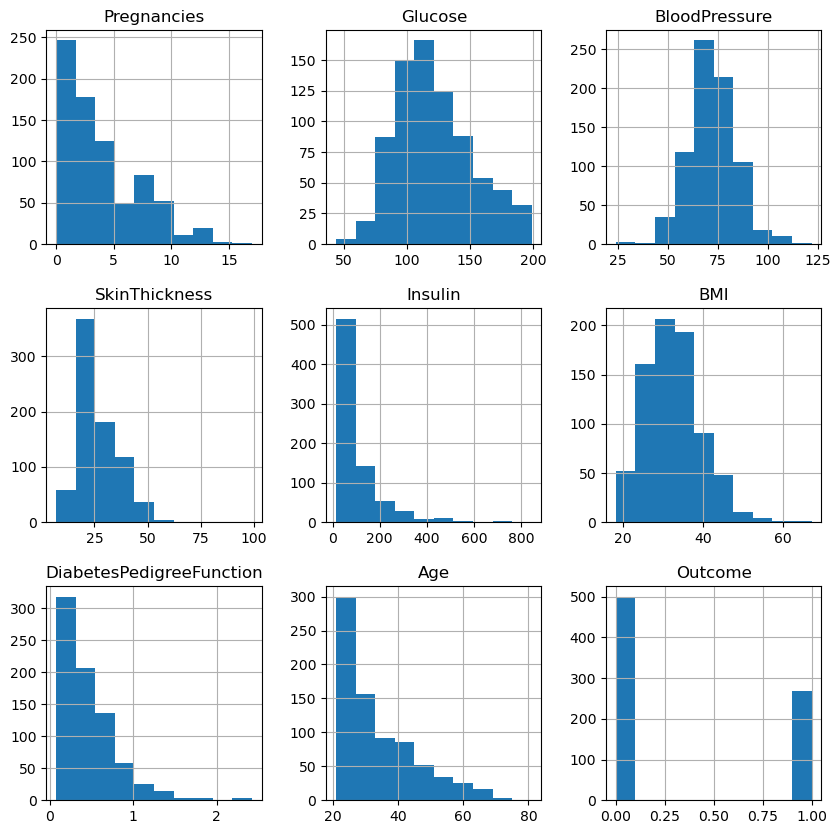

In [15]:
data.hist(bins=10,figsize=(10,10))
plt.show()

### Checking Outliers Using BoxPlot

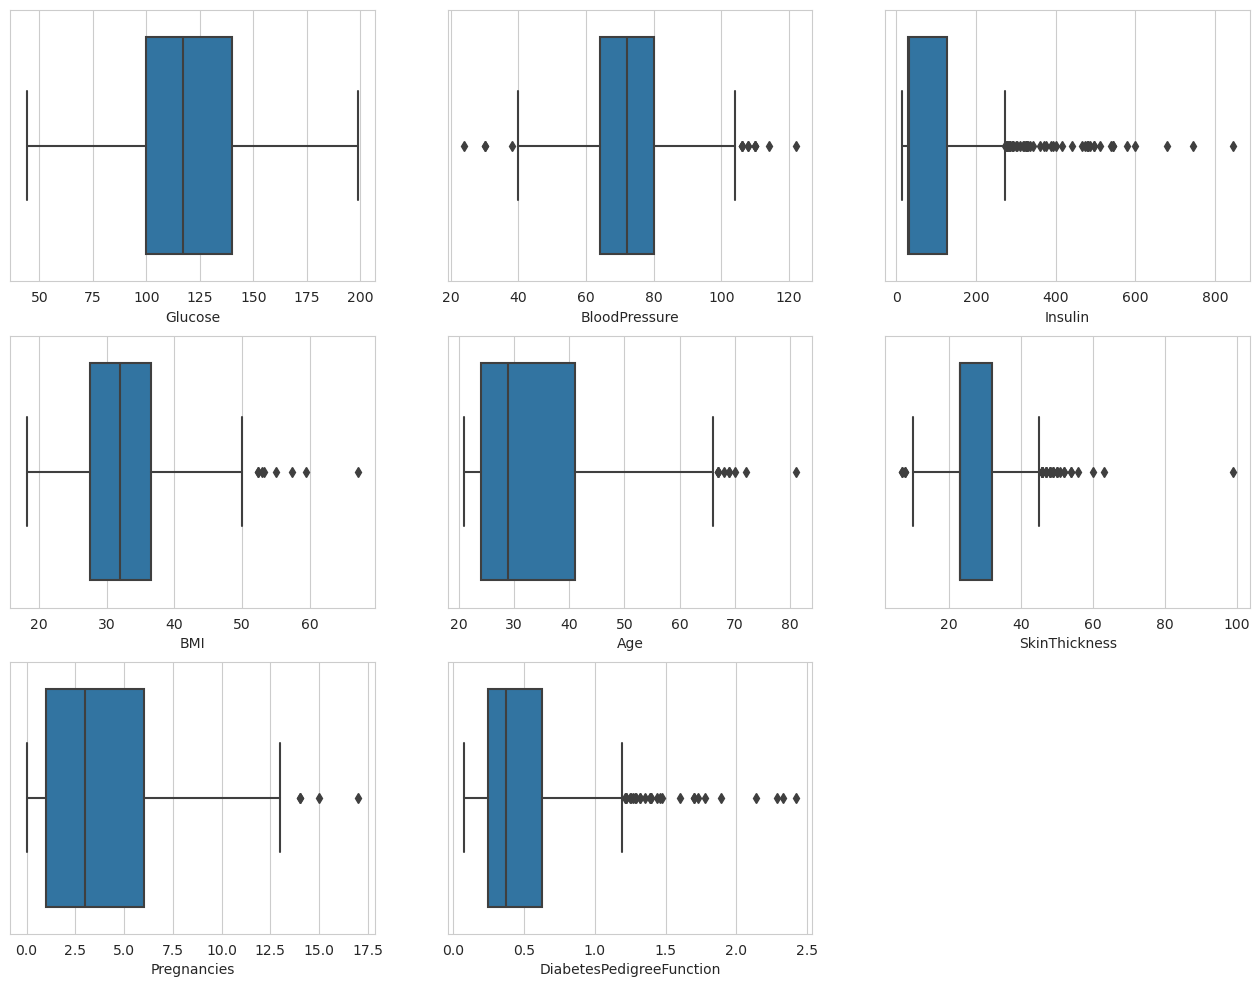

In [16]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=data)
plt.show()

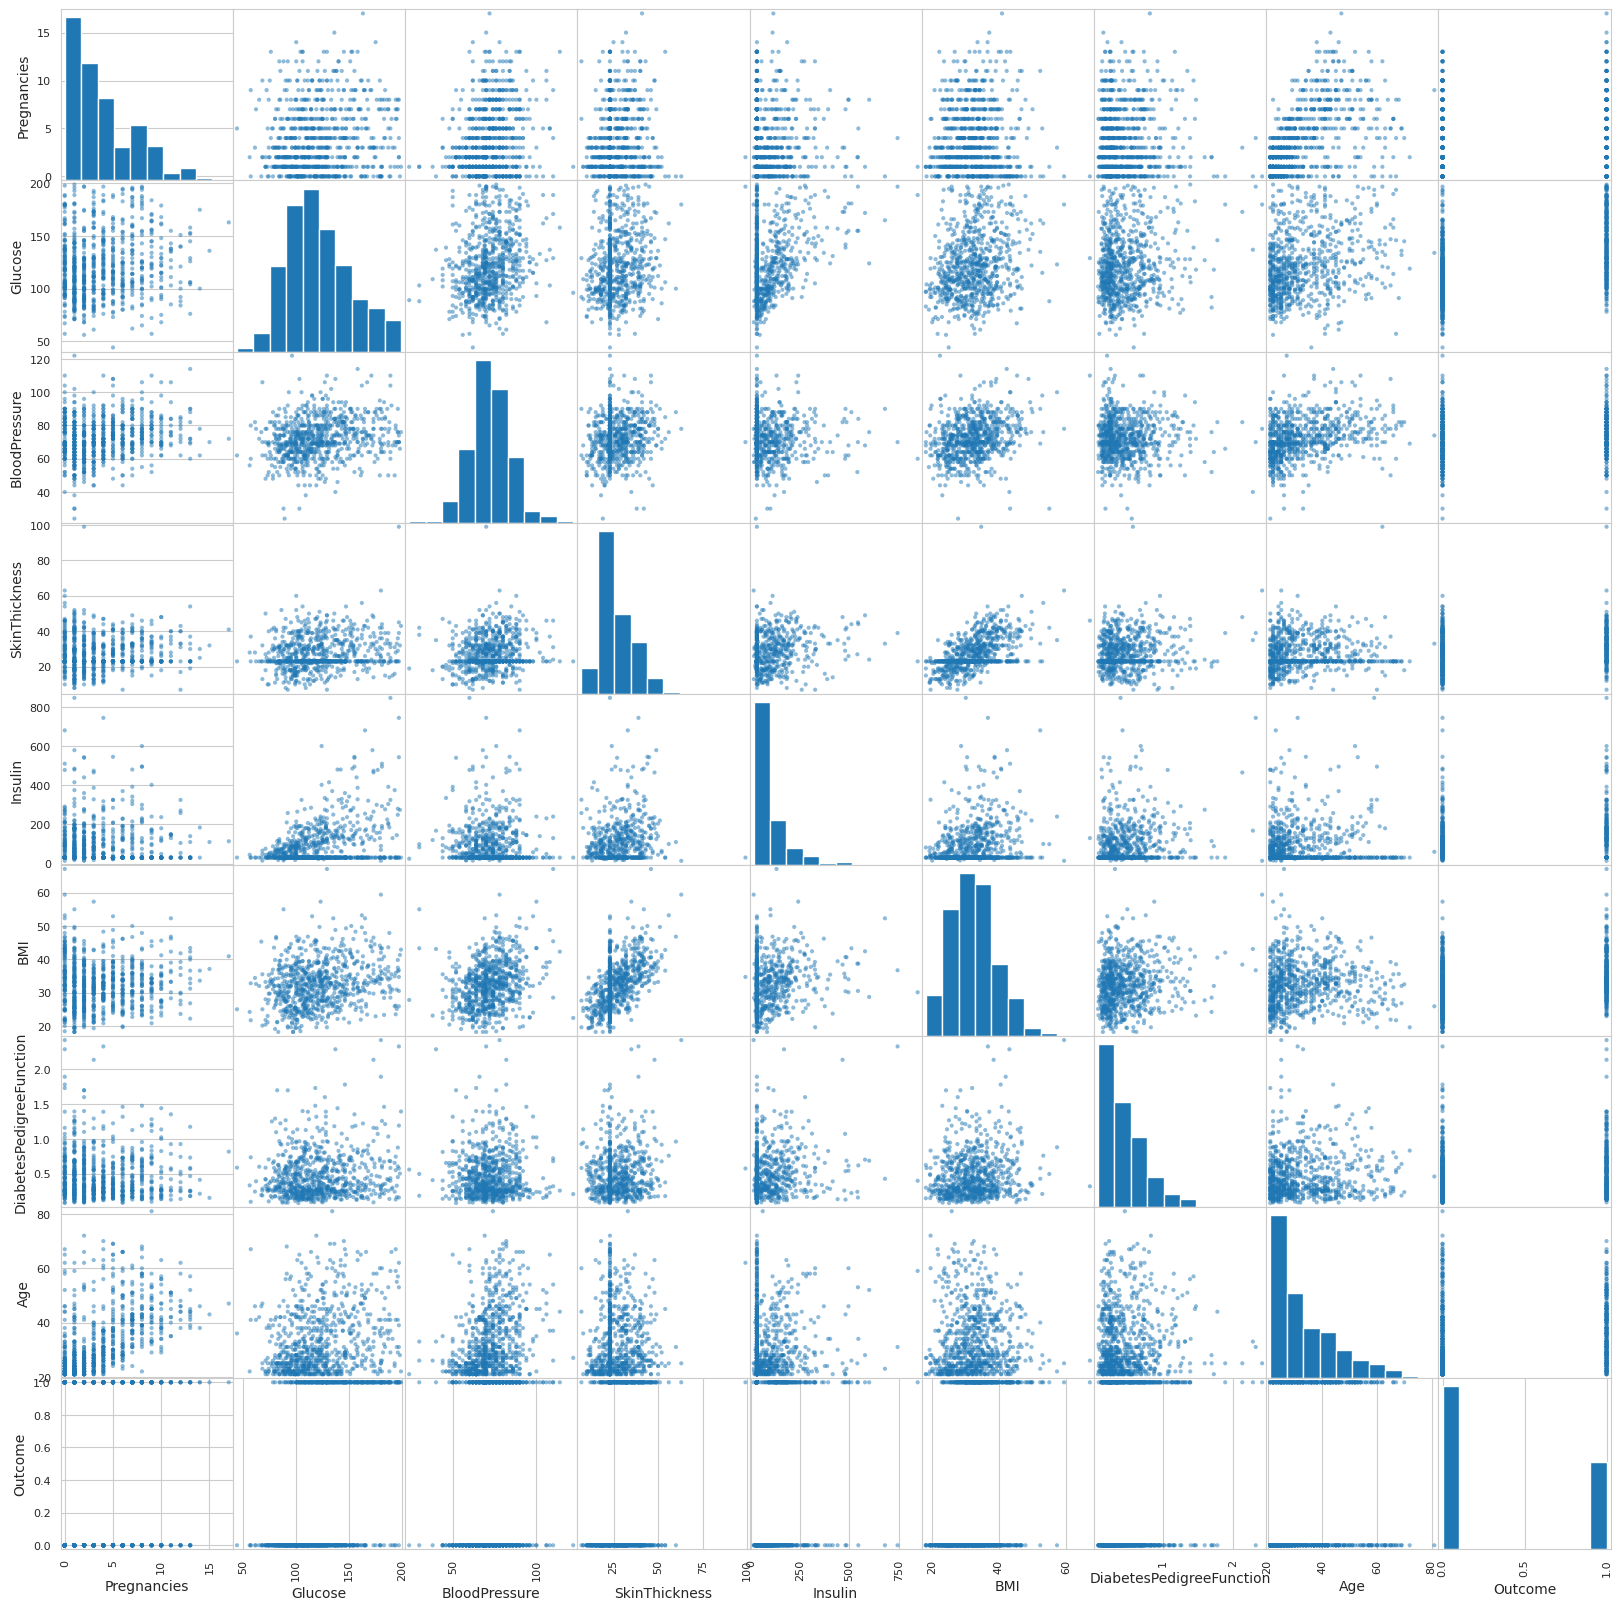

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));

# 5. Feature Selection

Pearson's Correlation Coefficient : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

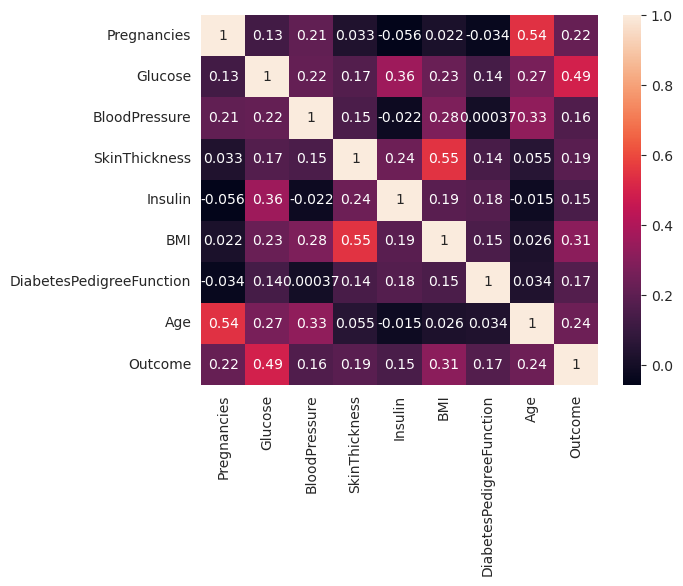

In [18]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

### Measure Importance of Feature using KBest

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.drop(['Outcome'],axis = 1)  
y = data['Outcome']    
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

                      Specs        Score
4                   Insulin  1989.589394
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.933725
3             SkinThickness    85.431282
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


### Selected Features

In [20]:
data_sf = data.drop(['DiabetesPedigreeFunction','BloodPressure','SkinThickness'], axis = 1)


In [21]:
data_sf.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

### Measure Importance of feature using Feature Importance


[0.10618587 0.23665502 0.10108787 0.08491725 0.07700857 0.14301757
 0.11428573 0.13684212]


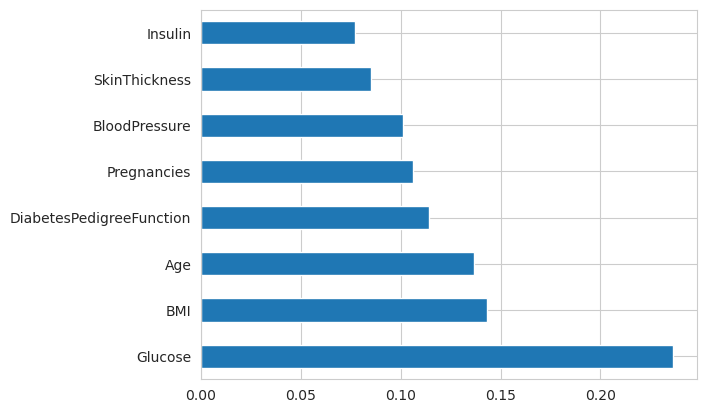

In [22]:
X = data.drop(['Outcome'],axis = 1) 
y = data['Outcome']    
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Handling Outliers

### Outliers removal

In [23]:
from sklearn.preprocessing import QuantileTransformer
x=data_sf
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
df_new.head()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.747718,0.810300,0.256193,0.591265,0.889831,1.0
1,0.232725,0.091265,0.256193,0.213168,0.558670,0.0
2,0.863755,0.956975,0.256193,0.077575,0.585398,1.0
3,0.232725,0.124511,0.662973,0.284224,0.000000,0.0
4,0.000000,0.721643,0.834420,0.926988,0.606258,1.0


<Axes: xlabel='Insulin'>

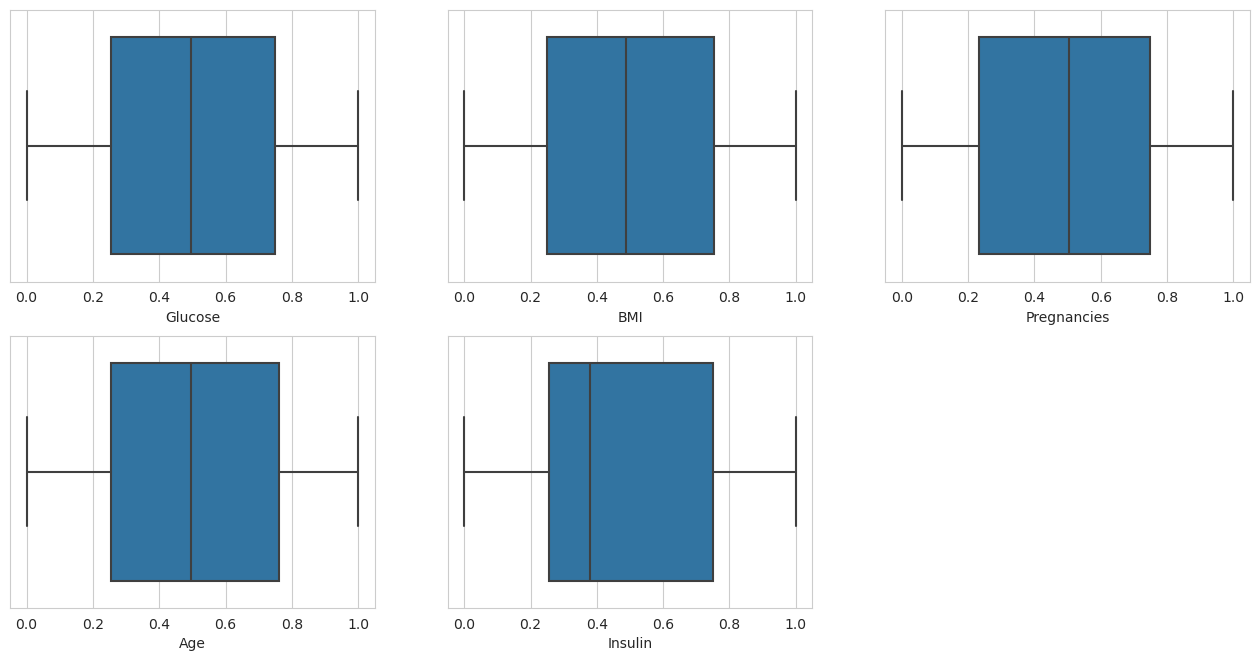

In [24]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['Insulin'],data=df_new)

# 7. Split Dataset for dependent and independent Features

In [25]:
X = df_new.drop(['Outcome'],axis = 1)

In [26]:
y = df_new['Outcome']

In [27]:
X.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,0.747718,0.810300,0.256193,0.591265,0.889831
1,0.232725,0.091265,0.256193,0.213168,0.558670
2,0.863755,0.956975,0.256193,0.077575,0.585398
3,0.232725,0.124511,0.662973,0.284224,0.000000
4,0.000000,0.721643,0.834420,0.926988,0.606258


In [28]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

# 8. Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.shape,y_train.shape

((614, 5), (614,))

# 9. Classification Algorithm

### 9.1 KNearest Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [32]:

knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [33]:
best_model = grid_search.fit(X_train,y_train)

In [34]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [35]:
knn_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       100
         1.0       0.71      0.65      0.68        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154


 F1:
 0.6796116504854369

 Precision score is:
 0.7142857142857143

 Recall score is:
 0.6481481481481481

 Confusion Matrix:



<Axes: >

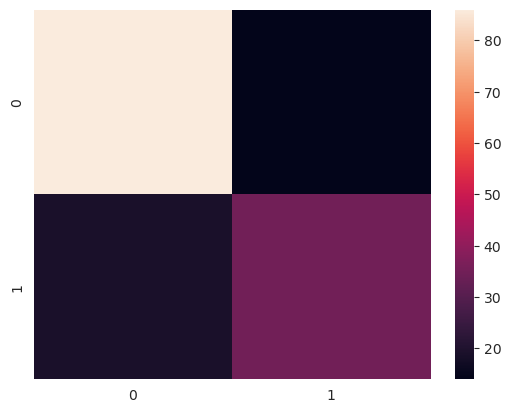

In [36]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

### 9.2 Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [38]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [39]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       100
         1.0       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154


 F1:
 0.6185567010309277

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.5555555555555556

 Confusion Matrix:



<Axes: >

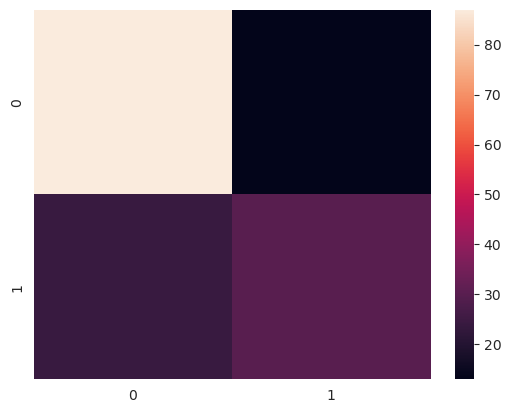

In [40]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

### 9.3 Support Vector Machine (SVM)

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [42]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [43]:

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [44]:
grid_result = grid_search.fit(X, y)

In [45]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       100
         1.0       0.85      0.74      0.79        54

    accuracy                           0.86       154
   macro avg       0.86      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154


 F1:
 0.6796116504854369

 Precision score is:
 0.7142857142857143

 Recall score is:
 0.6481481481481481

 Confusion Matrix:



<Axes: >

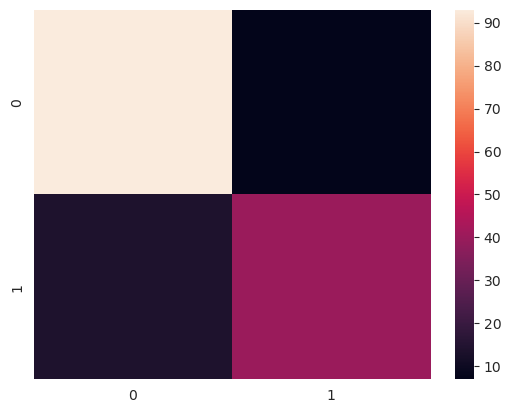

In [46]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

### 9.4 Decision Tree


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [48]:

params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [49]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [50]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [51]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       100
         1.0       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154


 F1:
 0.6336633663366336

 Precision score is:
 0.6808510638297872

 Recall score is:
 0.5925925925925926

 Confusion Matrix:



<Axes: >

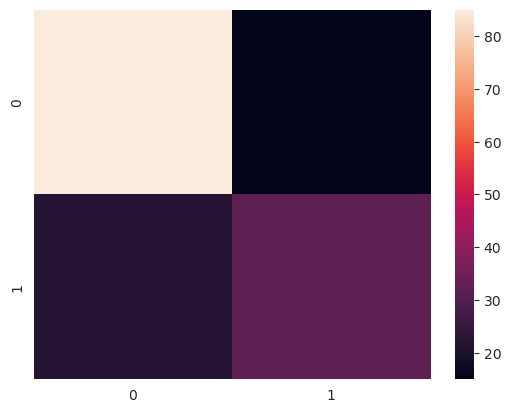

In [52]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

# 9.5 Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [54]:

model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [55]:

grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [56]:
best_model = grid_search.fit(X_train, y_train)

In [57]:
rf_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       100
         1.0       0.77      0.63      0.69        54

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6796116504854369

 Precision score is:
 0.7142857142857143

 Recall score is:
 0.6481481481481481

 Confusion Matrix:



<Axes: >

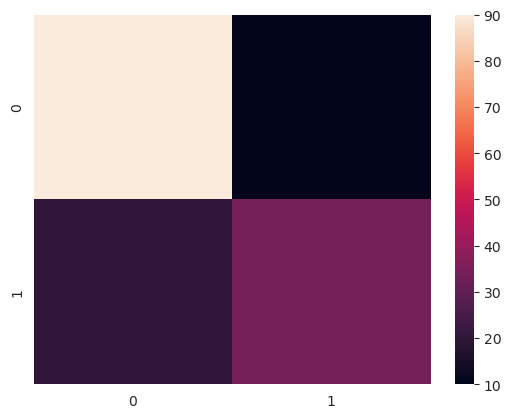

In [58]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

# 9.6 Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [60]:
reg = LogisticRegression()
reg.fit(X_train,y_train)    

LogisticRegression()

In [61]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       100
         1.0       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


 F1:
 0.6530612244897959

 Precision score is:
 0.7272727272727273

 Recall score is:
 0.5925925925925926

 Confusion Matrix:



<Axes: >

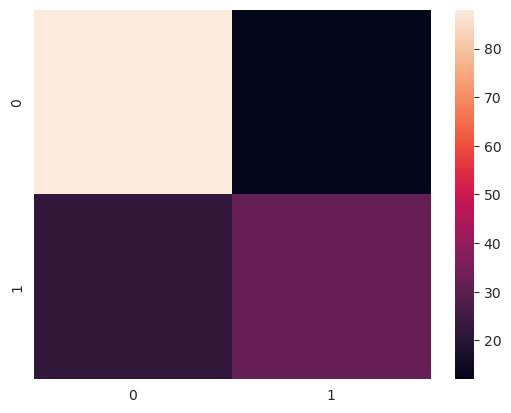

In [62]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))